In [1]:
import simulation
from propensities import loopModifyingPropensity, linearModifyingPropensity
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parm = dict()
parm['K'] = 20
parm['kdecay'] = 0.006
parm['km1'] = parm['K']*parm['kdecay']
parm['alpha'] = 0
parm['knuc'] = 1

half = 5
N = 2*half + 1
#x0 = np.ones((1,N))
x0 = np.zeros((1,N))
parm['cen'] = half
x0[0,half] = 1

reactionMatrix = np.concatenate([np.eye(N),(-1)*np.eye(N)],axis=0)

assert reactionMatrix.shape == (2*N,N)
print(x0)


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
## loop steadystate
sim = simulation.Simulation()
sim.addInit(x0)
sim.addPropensity(propensity_func=loopModifyingPropensity,**parm)
sim.addReaction(reactionMatrix)
print(sim.getState())


sim.run(runType='steadystate',rep=5,tspan=[0,100],nproc=1)

print(sim.getState())


[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Simulation proceeding--------(1/5)-
Simulation proceeding--------(2/5)-
Simulation proceeding--------(3/5)-
Simulation proceeding--------(4/5)-
Simulation proceeding--------(5/5)-
______Results Handeling______
checkpoint
_______Simulation Complete________
[[0.90000004 0.90000004 0.90000004 0.90000004 0.7        0.90000004
  0.90000004 0.7        0.8        0.4        0.5       ]
 [0.90000004 0.7        0.7        0.90000004 0.90000004 0.90000004
  0.90000004 0.8        0.90000004 0.3        0.5       ]
 [0.8        0.6        0.90000004 0.90000004 0.90000004 0.90000004
  0.7        0.8        0.90000004 0.6        0.7       ]
 [0.5        0.90000004 0.90000004 0.8        0.90000004 0.90000004
  0.6        0.90000004 0.7        0.90000004 0.90000004]
 [0.7        0.6        0.7        0.90000004 0.90000004 0.90000004
  0.90000004 0.90000004 0.90000004 0.90000004 0.90000004]]


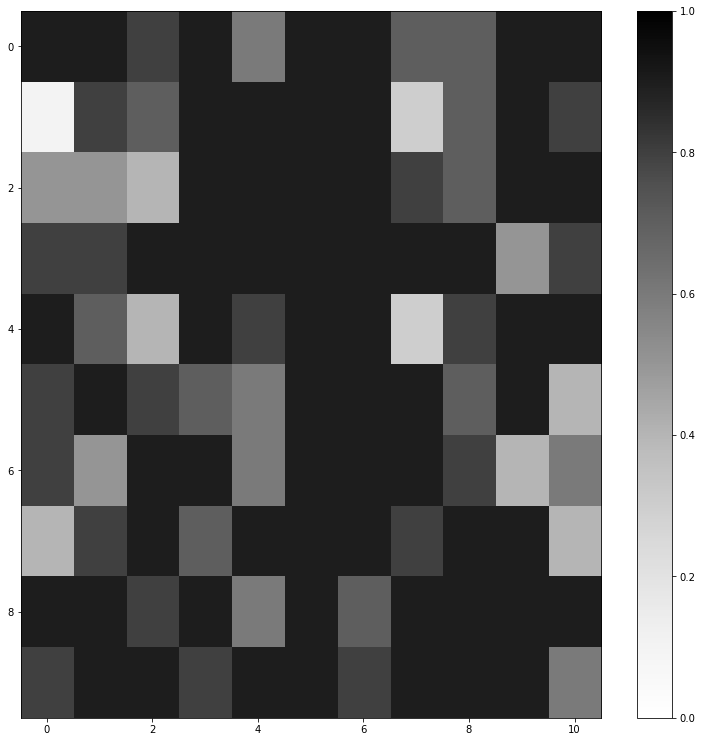

In [16]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.colorbar()
plt.show()

In [3]:
## loop timeevolution

sim = simulation.Simulation()
sim.addInit(x0)
sim.addPropensity(propensity_func=loopModifyingPropensity,**parm)
sim.addReaction(reactionMatrix)
print(sim.getState())


sim.run(runType='timeevolution',rep=5,tspan=[0,100],nproc=1)

print(sim.getState())

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Simulation proceeding--------(1/5)-
Simulation proceeding--------(2/5)-
Simulation proceeding--------(3/5)-
Simulation proceeding--------(4/5)-
Simulation proceeding--------(5/5)-
_______Results Handeling_______
_______Simulation Complete________
[[0.025      0.1        0.         ... 0.         0.         0.03333334]
 [0.4        0.2        0.2        ... 0.2        0.         0.        ]
 [0.05       0.2        0.25       ... 0.2        0.1        0.1       ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.2        0.         0.2        ... 0.2        0.2        0.2       ]
 [0.1        0.         0.         ... 0.1        0.1        0.1       ]]


In [ ]:
sim.getState()

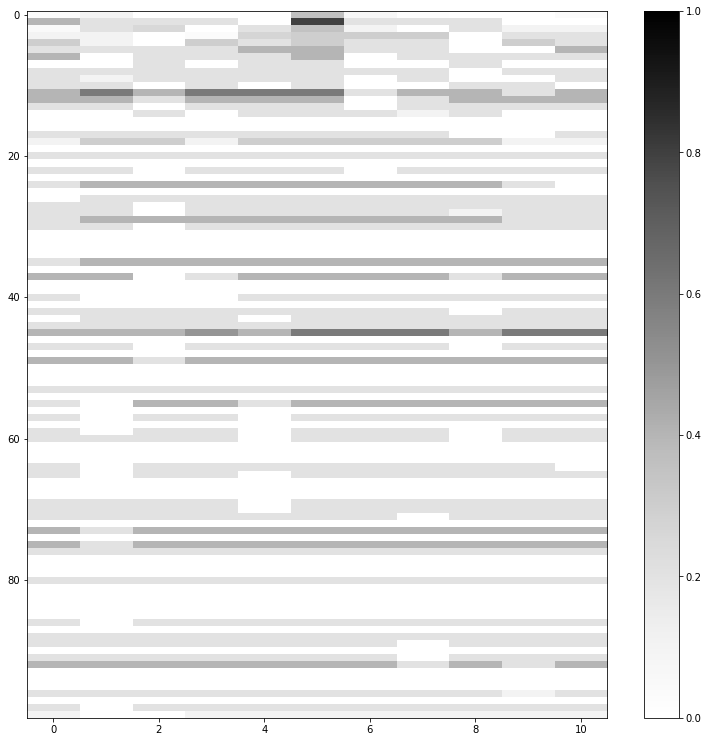

In [4]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.colorbar()
plt.show()

In [5]:
## linear steadystate
sim2 = simulation.Simulation()
sim2.addInit(x0)
sim2.addPropensity(propensity_func=linearModifyingPropensity,**parm)
sim2.addReaction(reactionMatrix)
print(sim2.getState())

#sim2.run(runType='timeevolution',rep=100,tspan=[0,100],nproc=1)
#print(sim2.getState())

#sim2.addInit(x0)
sim2.run(runType='steadystate',rep=10,tspan=[0,1000],nproc=1)

print(sim2.getState())

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Simulation proceeding--------(1/10)-
Simulation proceeding--------(2/10)-
Simulation proceeding--------(3/10)-
Simulation proceeding--------(4/10)-
Simulation proceeding--------(5/10)-
Simulation proceeding--------(6/10)-
Simulation proceeding--------(7/10)-
Simulation proceeding--------(8/10)-
Simulation proceeding--------(9/10)-
Simulation proceeding--------(10/10)-
_______Results Handeling_______
_______Simulation Complete________
[[0.8        0.7        0.8        0.8        0.90000004 0.90000004
  0.90000004 0.90000004 0.90000004 0.90000004 0.7       ]
 [0.90000004 0.8        0.8        0.90000004 0.90000004 0.90000004
  0.90000004 0.7        0.90000004 0.8        0.8       ]
 [0.90000004 0.90000004 0.8        0.8        0.7        0.90000004
  0.90000004 0.8        0.90000004 0.8        0.90000004]
 [0.90000004 0.5        0.90000004 0.90000004 0.90000004 0.90000004
  0.90000004 0.7        0.90000004 0.5        0.90000004]
 [0.6        0.8     

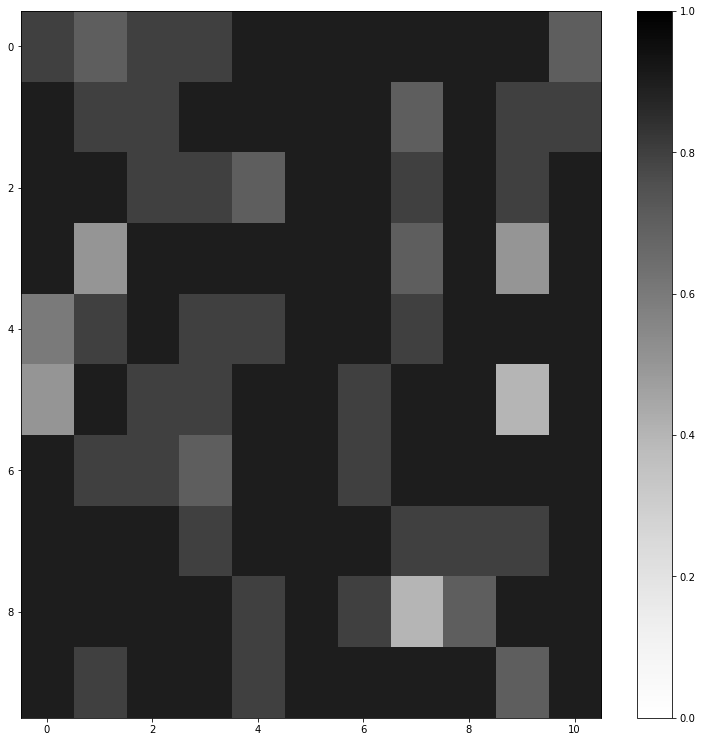

In [6]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim2.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.colorbar()
plt.show()

In [7]:
## linear timeevolution
sim3 = simulation.Simulation()
sim3.addInit(x0)
sim3.addPropensity(propensity_func=linearModifyingPropensity,**parm)
sim3.addReaction(reactionMatrix)
print(sim3.getState())


sim3.run(runType='timeevolution',rep=10,tspan=[0,1000],nproc=1)

print(sim3.getState())

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Simulation proceeding--------(1/10)-
Simulation proceeding--------(2/10)-
Simulation proceeding--------(3/10)-
Simulation proceeding--------(4/10)-
Simulation proceeding--------(5/10)-
Simulation proceeding--------(6/10)-
Simulation proceeding--------(7/10)-
Simulation proceeding--------(8/10)-
Simulation proceeding--------(9/10)-
Simulation proceeding--------(10/10)-
_______Results Handeling_______
_______Simulation Complete________
[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.1  0.2  0.1  ... 0.1  0.2  0.1 ]
 [0.2  0.25 0.15 ... 0.2  0.25 0.2 ]
 [0.05 0.05 0.05 ... 0.05 0.05 0.05]]


In [8]:
sim3.getState().shape

(1000, 11)

In [9]:
print(sim3.getState()[:,5])

[0.4041667  0.2        0.2        0.25       0.1        0.3
 0.4        0.4        0.3        0.2        0.4        0.3
 0.1        0.13333334 0.2        0.3        0.         0.2
 0.3        0.25       0.1        0.2        0.3        0.2
 0.1        0.1        0.3        0.2        0.2        0.
 0.         0.2        0.2        0.25       0.         0.1
 0.2        0.1        0.1        0.         0.         0.
 0.3        0.1        0.2        0.1        0.1        0.1
 0.         0.2        0.15       0.1        0.1        0.2
 0.1        0.         0.1        0.15       0.2        0.1
 0.2        0.3        0.1        0.1        0.         0.2
 0.         0.2        0.         0.1        0.         0.1
 0.         0.1        0.         0.3        0.3        0.
 0.1        0.1        0.175      0.1        0.1        0.
 0.1        0.1        0.         0.1        0.1        0.1
 0.2        0.2        0.1        0.1        0.         0.1
 0.         0.1        0.         0.        

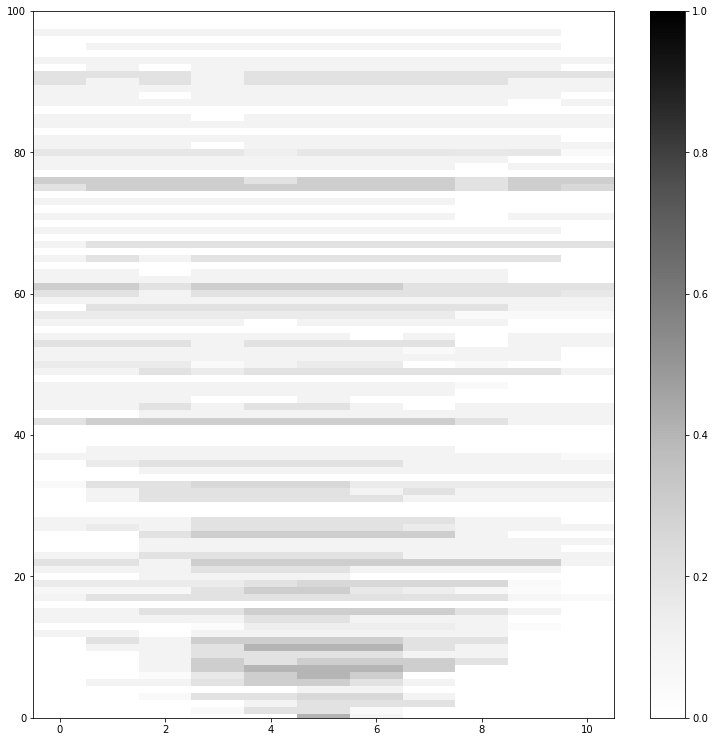

In [10]:
fig = plt.figure(figsize=(13,13))
plt.imshow(sim3.getState(),cmap='Greys',vmin=0,vmax=1)
plt.axis('auto')
plt.ylim(0,100)
plt.colorbar()
plt.show()